<a href="https://colab.research.google.com/github/vi0908/MC/blob/main/puntos_de_Lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import bisect

# **UNIDADES UNITARIAS**

Las ecuaciones y el cálculo involucrado en el problema de los tres cuerpos restringido y circular pueden simplificarse y facilitarse notablemente por intermedio de la utilización de las siguientes convenciones y cambio de unidades:



1.   La suma de las dos masas principales es igual a la unidad, esto es, $m_1+m_2 = 1$. Con esto se puede escribir la masa de $m_1$ en términos de $m_2$ así: $m_1 = 1 - m_2$.

2.   La distancia existente entre los dos cuerpos principales es igual a la unidad. Así, se tiene: $a = 1 = x_2 - x_1$. Por lo tanto: $-x_1 = m_2$ y  $ x_2 = m_1 = 1 - m_2$

3. Se adopta, según el sistema involucrado en particular, una unidad de tiempo
conveniente de modo tal que se pueda hacer $G = n_2 = 1$ (lo cual es siempre
posible hacerse). Nótese, entonces que el periodo de $m_2$ con respecto a $m_1$ es igual a $2\pi$.

In [ ]:
# UNIDADES UNITARIAS SIN SUPONER VALOR DE M2 PARA ÓRBITA CIRCULAR

tiene_a = input('Tiene el valor de a en metros (s/n): ')

if tiene_a == 's':
  a = float(input('ingrese a (en metros): '))

else:
  a = float(input('ingrese a (en u.a): '))
  a = a * 149597870.7e3 # en u.a

print('\n\n---> a = {} m \n\n'.format(a))

tiene_masas = input('Tiene el valor de las masas (en kg): ')

if tiene_masas == 's':
  m1_real = float(input('ingrese m1: ')) # en kg
  m2_real = float(input('ingrese m2: ')) # en kg

else:
  pass
 ####
m1_real = 0.89 * 1.998e30
m2_real = 0.13 * 1.998e30
###
tiene_proporcion = input('\n\nTiene la proporción entre las masas (s/n): ')

if tiene_proporcion == 's':
  proporcion = float(input('Ingrese m_1 / m_2: '))
  proporcion = 1 / proporcion
  m2 = 1 / ((1 / proporcion) + 1)
  m1 = 1 - m2

else:
  proporcion_masas = m2_real / m1_real
  m2 = 1 / ((1 / proporcion_masas) + 1)
  m1 = 1 - m2

print('\n\n---> m1 = {}\n\n---> m2 = {} \n\n'.format(m1,m2))

tiene_periodo = input('Tiene el valor del periodo orbital (s/n): ')

if tiene_periodo == 's':

  T = float(input('ingrese el valor del periodo orbital (en días): '))

else:
  orbita_sol = input("m2 se encuentra orbitando al Sol (s/n): ")

  if orbita_sol == 's':
    T = (2 * math.pi * pow ((a / 149597870.7e3), (3/2)))/ (0.01720209908 * math.sqrt(1 + (m2 / m1)))

  else:
    T = ((2 * math.pi * pow(a, (3/2))) / (math.sqrt(6.67e-11*(m1_real + m2_real)))) / 86400

t = T / (2 * math.pi)

print('\n\n---> periodo: T = {} días \n\n---> unidad de tiempo (para que G = 1): t = {} días'.format(T, t))

x1 = -m2
x2 = m1

print('\n\n---> x1 = {} \n\n---> x2 = {}'.format(x1,x2))


Tiene el valor de a en metros (s/n): n
ingrese a (en u.a): 0.465


---> a = 69563009875.5 m 


Tiene el valor de las masas (en kg): s
ingrese m1: 1
ingrese m2: 1


Tiene la proporción entre las masas (s/n): n


---> m1 = 0.8725490196078431

---> m2 = 0.12745098039215685 


Tiene el valor del periodo orbital (s/n): n
m2 se encuentra orbitando al Sol (s/n): n


---> periodo: T = 114.43870338151565 días 

---> unidad de tiempo (para que G = 1): t = 18.213485324195414 días


---> x1 = -0.12745098039215685 

---> x2 = 0.8725490196078431


In [ ]:
(360 * 30) / T

94.37366625865175

In [ ]:
T

114.43870338151565

In [ ]:
m = (x1 * a)
(m/1000)+ 5550000

-3315873.8076617643

In [ ]:
# UNIDADES UNITARIAS SUPONIENDO EL VALOR DE M2

m2 = # en unidades unitarias
m1 = 1 - m2
x1 = -m2 # posición respecto al CM
x2 = m1

print('---> m1 = {} \n---> m2 = {} \n---> x1 = {} \n---> x2 = {}'.format(m1, m2, x1, x2))

---> m1 = 0.75 
---> m2 = 0.25 
---> x1 = -0.25 
---> x2 = 0.75


# **Puntos de Lagrange**
Existen unas soluciones particulares para el problema de los tres cuerpos denominadas los puntos de Lagrange. Aunque, como se dijo reiteradamente en el capítulo anterior, las ecuaciones del problema de los 3 cuerpos no tienen una solución analítica, es posible encontrar algunas soluciones particulares. Son soluciones en el sentido de que, al colocar a la masa $m_3$ en unas posiciones determinadas y otorgarles velocidad cero (con relación
a los ejes rotantes) la partícula permanecerá en tales puntos para todo tiempo. Supóngase la existencia de puntos en los cuales al ubicar la masa $m_3$ con respecto a los ejes en rotación, y asignarle una velocidad cero ($\dot{x}= 0$, $\dot{y}= 0$), la partícula tampoco estará acelerada en el tiempo ($\ddot{x} = \ddot{y}  = 0$) y se ubicará, como si estuviera estática. Pero antes de continuar, haremos un pequeño paréntesis
para efectos de colocar la función $U$ en una forma más conveniente utilizando unidades unitarias.



> $$U = \frac{1}{2}(x^2+y^2)+\frac{m_1}{\sqrt{(x+m_2)^2+y^2}}+\frac{m_2}{\sqrt{(x-1+m_2)^2+y^2}}$$

Ahora bien, para facilidad en la realización de ciertas derivadas parciales, colocaremos $x_2 + y_2$ (que está presente en $U$) en términos de ρ1 y ρ2.



> $$m_1\rho_1^2 + m_2\rho_2^2 = x^2 + y^2 + m_1m_2,$$

De este modo:


> $$U = \frac{1}{2}(m_1\rho_1^2+ m_2\rho_2^2 − m_1m_2) +\frac {m_1}
{\rho_1} + \frac{m_2}{\rho_2}$$




Retomando la búsqueda de los puntos de velocidad nula, los cuales, como se ha
dicho, han de satisfacer: $\dot{x} = \dot{y} = \ddot{x} = \ddot{y} = 0 $, las ecuaciones de movimiento en el plano $xy$ en términos de las derivadas parciales de $U$, se reducen a:



> $$\frac{\partial U}{\partial x} = 0 \ \ \ \ \ \frac{\partial U}{\partial y} = 0$$

Estas dos últimas ecuaciones constituyen una forma equivalente de buscar los puntos de velocidad y aceleración nula, pues si ambas se satisfacen simultáneamente, se constituyen en la condición para encontrar puntos con dos tangentes en las regiones de Hill. Es evidente que aquellos puntos en los que, para ciertos valores de $C'$, dos superficies de Hill se tocan, pueden verse como puntos en los que simultáneamente existen dos tangentes: una paralela al eje $x$ y otra paralela al eje $y$.

Como $U$ es función de las distancias $\rho_1$ y $\rho_2$, las cuales, a su vez, son funciones de $x$ y de $y$, se tiene:



> $$\frac{\partial{U}}{\partial{x}} = \frac{\partial{U}}{\partial{\rho_1}} \frac{\partial{\rho_1}}{\partial{x}} + \frac{\partial{U}}{\partial{\rho_2}} \frac{\partial{\rho_2}}{\partial{x}}=0$$

> $$\frac{\partial{U}}{\partial{y}} = \frac{\partial{U}}{\partial{\rho_1}} \frac{\partial{\rho_1}}{\partial{y}} + \frac{\partial{U}}{\partial{\rho_2}} \frac{\partial{\rho_2}}{\partial{y}}=0$$



# **Puntos triangulares**

Comencemos por hallar aquellos puntos que están ubicados en el plano. Tenemos:


> $$\left(m_1\rho_1-\frac{m_1}{\rho_1^2}\right)\frac{x+m_2}{\rho_1}+\left(m_2\rho_2-\frac{m_2}{\rho_2^2}\right)\frac{x+m_1}{\rho_2}=0$$

De la que se puede inferir que una solución de esta es que satisfaga simultáneamente la condición:


> $$\left(m_1\rho_1-\frac{m_1}{\rho_1^2}\right)=\left(m_2\rho_2-\frac{m_2}{\rho_2^2}\right)= 0$$

Y así es inmediato ver que:



> $$\rho_1=\rho_2=1$$

La única configuración para que se cumpla esta igualdad es que la masa $m_3$ ha de estar ocupando un vértice de un triángulo equilátero (ya que la distancia entre las dos masas principales es también igual a uno, en dimensiones unitarias). Por simetría, $m_3$ puede ubicarse adelante de las masas principales, punto que se denomina L4, pero también puede ubicarse atrás, denominado L5.

Esto indica que una partícula de masa infinitesimal que se ubica con velocidad cero (con respecto a los ejes rotantes) exactamente en L4 (o en L5) permanecerá indefinidamente $60º$ adelante (o atrás) de la partícula de masa $m_2$. Con relación a los ejes inerciales, se tiene que los puntos L4 y L5 describen, cada uno de ellos, órbitas circulares con respecto al primario invirtiendo el mismo periodo orbital en torno a este que lo que gasta el secundario.


Las coordenadas $x$ y $y$ correspondientes a estos puntos pueden calcularse como sigue. Es evidente que las ecuaciones de las distancias quedan en tales puntos como:



> $$1=(x+m_2)^2+y^2 \ \ \ (1)$$
> $$1=(x-m_1)^2+y^2\ \ \ (2)$$

de las que, al multiplicar la primera por $m_1$ y la segunda por $m_2$, recordando que $m_1 + m_2 = 1$:



> $$ 1 = x^2 + m_1m_2 + y^2$$

Iguañando con $(1)$ y eliminando términos semejantes se obtiene, habiendo colocado $m_1$ en términos de $m_2$:



> $$x = \frac{1}{2} - m_2$$

Sumando $(1)$ con $(2)$, factorando y ordenando términos, se llega directamente a:


> $$y = \pm \frac{\sqrt{3}}{2}$$

Por lo tanto:


> $$L_4 = (\frac{1}{2}-m_2, \frac{\sqrt{3}}{2} )$$


> $$L_5 = (\frac{1}{2}-m_2, -\frac{\sqrt{3}}{2} )$$










In [ ]:
l4x = 0.5 - m2
l4y = math.sqrt(3) / 2

l5x= 0.5 - m2
l5y = -math.sqrt(3) / 2

print('---> L4 = ({},{}) \n\n---> L5 =({},{})'.format(l4x, l4y, l5x, l5y))

---> L4 = (0.37254901960784315,0.8660254037844386) 

---> L5 =(0.37254901960784315,-0.8660254037844386)


# **Puntos colineales**

Existen tres de los puntos buscados ubicados sobre el eje $x (y = 0)$. Buscaremos a continuación en qué parte exactamente del eje $x$ se ubican. Primero, se tiene que $y=0$, además:


> $$m_1 \left(1-\frac{1}{\rho_1^3}\right)(x+m_2)+m_2\left(1-\frac{1}{\rho_2^3}\right)(x-m_1)=0$$

la cual, al desarrollar los productos indicados y como los puntos buscados están sobre el eje $x$, $\rho_1$ y $\rho_2$ quedan reducidos a $\rho_1 = x + m_2$ y $\rho_2 = x − m_1$, y así:

> $$-x+\frac{m_1}{|x+m_2|^3}(x+m_2)+\frac{m_2}{|x-m_1|^3}(x-m_1)=0$$

en donde se ha enfatizado el hecho de que $\rho_1$ y $\rho_2$, por ser distancias, son valores positivos. Teniendo en cuenta que $m_1 +m_2 = 1$, la ecuación anterior puede escribirse en términos de un único parámetro, así:



> $$-x+\frac{1-m_2}{|x+m_2|^3}(x+m_2)+\frac{m_2}{|x-1+m_2|^3}(x-1+m_2)=0$$





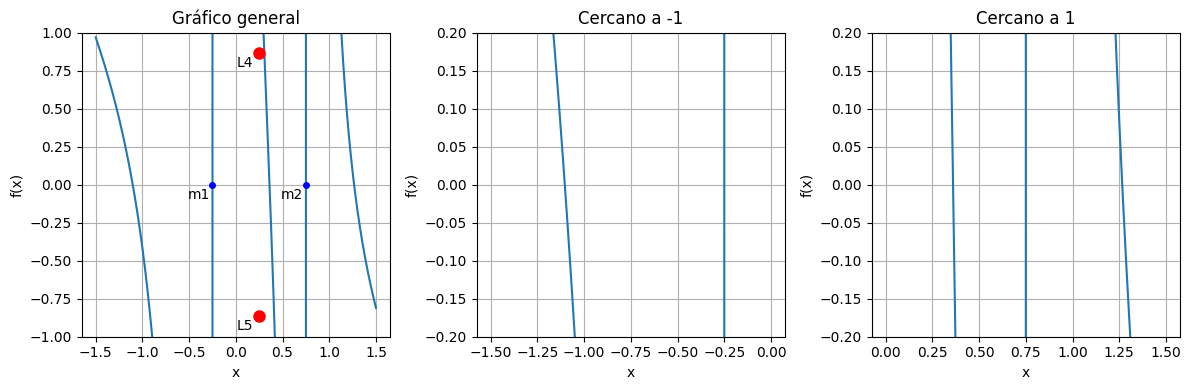

In [ ]:
# GRÁFICA DE LA FUNCIÓN

# Definir la ecuación que representa la función

def f(x):
    return -x + ((1 - m2) * (x + m2)/ pow(np.abs(x + m2), 3)) + (m2 * (x - 1 + m2)/pow(np.abs(x -1 + m2), 3))

# Valores para x
xg = np.linspace(-1.5, 1.5, 10000)
xminus = np.linspace(-1.5, 0, 10000)
xplus = np.linspace(0., 1.5, 10000)


# Calcular los valores de f(x)
yg = f(xg)
yminus = f(xminus)
yplus = f(xplus)

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Gráfico general
axs[0].plot(xg, yg)
axs[0].set_ylim(-1,1)
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].set_title('Gráfico general')
axs[0].grid(True)

axs[0].plot(x1, 0, 'bo', markersize=4)  # Marcar el punto
axs[0].annotate('m1', (x1, 0), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=10)

axs[0].plot(x2, 0, 'bo', markersize=4)  # Marcar el punto
axs[0].annotate('m2', (x2, 0), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=10)

axs[0].plot(l4x, l4y, 'ro', markersize=8)  # Marcar el punto
axs[0].annotate('L4', (l4x, l4y), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=10)

axs[0].plot(l5x, l5y, 'ro', markersize=8)  # Marcar el punto
axs[0].annotate('L5', (l5x, l5y), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=10)

# Gráfico cercano a -1
axs[1].plot(xminus, yminus)
axs[1].set_ylim(-0.2,0.2)
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].set_title('Cercano a -1')

axs[1].grid(True)

# Gráfico cercano a 1
axs[2].plot(xplus, yplus)
axs[2].set_ylim(-0.2, 0.2)
axs[2].set_xlabel('x')
axs[2].set_ylabel('f(x)')
axs[2].set_title('Cercano a 1')
axs[2].grid(True)

plt.tight_layout()
plt.show()



In [ ]:
# SOLUCIÓN DE LA ECUACIÓN
def ecuacion(x):
    return -x + ((1 - m2) * (x + m2) / np.abs(x + m2)**3) + (m2 * (x - 1 + m2)/ np.abs(x - 1 + m2)**3)
# Encontrar las tres soluciones DE ACUERDO CON EL GRÁFICO cambiar los parámetros para hallar las soluciones
solucion_1 = bisect(ecuacion, -10, -1.0)
solucion_2 = bisect(ecuacion, 0.1,0.5)
solucion_3 = bisect(ecuacion, 1.2, 1.4)

# Imprimir las soluciones
print('---> L3 = {}\n\n---> L1 = {}\n\n---> L2 = {}'.format(solucion_1, solucion_2, solucion_3))

---> L3 = -1.1031668488222977

---> L1 = 0.36074342836654977

---> L2 = 1.2658581025098103


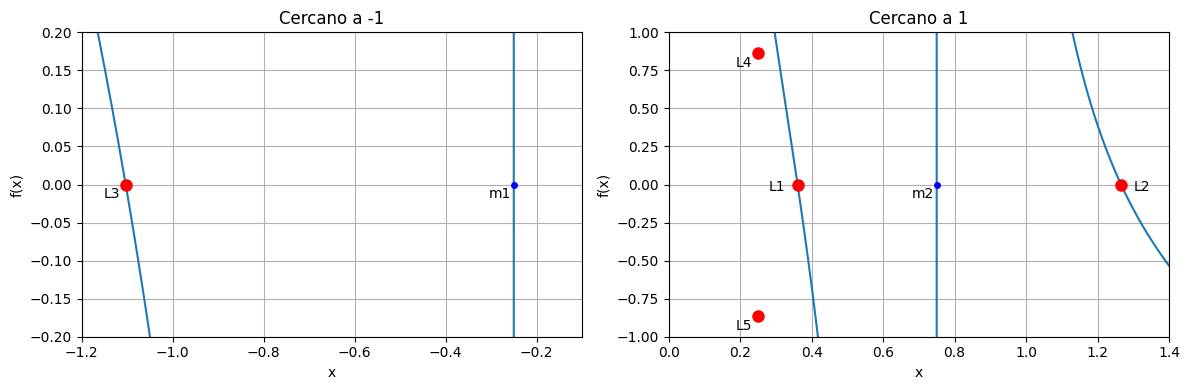

In [ ]:
# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico cercano a -1
axs[0].plot(xminus, yminus)
axs[0].set_ylim(-0.2,0.2)
axs[0].set_xlim(-1.2,-0.1)
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].set_title('Cercano a -1')

axs[0].plot(solucion_1, 0, 'ro', markersize=8)  # Marcar el punto
axs[0].annotate('L3', (solucion_1, 0), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=10)

axs[0].plot(solucion_2, 0, 'ro', markersize=8)  # Marcar el punto
axs[0].annotate('L1', (solucion_2, 0), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=10)

axs[0].plot(solucion_3, 0, 'ro', markersize=8)  # Marcar el punto
axs[0].annotate('L2', (solucion_3, 0), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=10)

axs[0].plot(x1, 0, 'bo', markersize=4)  # Marcar el punto
axs[0].annotate('m1', (x1, 0), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=10)

axs[0].plot(l4x, l4y, 'ro', markersize=8)  # Marcar el punto
axs[0].annotate('L4', (l4x, l4y), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=10)

axs[0].plot(l5x, l5y, 'ro', markersize=8)  # Marcar el punto
axs[0].annotate('L5', (l5x, l5y), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=10)


axs[0].grid(True)

# Gráfico cercano a 1
axs[1].plot(xplus, yplus)
axs[1].set_xlim(0.0,1.4)
axs[1].set_ylim(-1, 1)
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].set_title('Cercano a 1')
axs[1].grid(True)

axs[1].plot(solucion_1, 0, 'ro', markersize=8)  # Marcar el punto
axs[1].annotate('L3', (solucion_1, 0), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=10)

axs[1].plot(solucion_2, 0, 'ro', markersize=8)  # Marcar el punto
axs[1].annotate('L1', (solucion_2, 0), textcoords="offset points", xytext=(-15,-5), ha='center', fontsize=10)

axs[1].plot(solucion_3, 0, 'ro', markersize=8)  # Marcar el punto
axs[1].annotate('L2', (solucion_3, 0), textcoords="offset points", xytext=(15,-5), ha='center', fontsize=10)

axs[1].plot(x2, 0, 'bo', markersize=4)  # Marcar el punto
axs[1].annotate('m2', (x2, 0), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=10)

axs[1].plot(l4x, l4y, 'ro', markersize=8)  # Marcar el punto
axs[1].annotate('L4', (l4x, l4y), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=10)

axs[1].plot(l5x, l5y, 'ro', markersize=8)  # Marcar el punto
axs[1].annotate('L5', (l5x, l5y), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=10)



plt.tight_layout()
plt.show()
